# Prepare to start <a class="anchor" id="prepare"></a>

## Loading packages

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [2]:
train = pd.read_csv("../input/rsna-2022-cervical-spine-fracture-detection/train.csv")

## What do we know about our training data?

In [3]:
train.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [4]:
train.shape

(2019, 9)

# Images

In [5]:
""" Important concepts about images:
        - train_images contains 2019 folders with lot of files inside. Each folder represents one study of one patient.
        - each dicom file, contains some metadata of the image itself. One of the parameters we are interested in is the 'ImagePositionPatient'.
          It represents the patient position (x,y,z) of each slide image. The z axis is important, because we need to know which vertebrae is shown in 
          the picture. The 'z' axis tell us the position in the SAGITAL PANE.
        - however, all images inside of train_image folder were taken in the AXIAL PANE. So we are seeing an image of some vertebrae but we don't know
          exactly which one is. The answer is in the SAGITAL PANE.
        - So, to know which bone we are referencing, we need to look at the "segmentations" folder 
        
"""

' Important concepts about images:\n        - train_images contains 2019 folders with lot of files inside. Each folder represents one study of one patient.\n        - each dicom file, contains some metadata of the image itself. One of the parameters we are interested in is the \'ImagePositionPatient\'.\n          It represents the patient position (x,y,z) of each slide image. The z axis is important, because we need to know which vertebrae is shown in \n          the picture. The \'z\' axis tell us the position in the SAGITAL PANE.\n        - however, all images inside of train_image folder were taken in the AXIAL PANE. So we are seeing an image of some vertebrae but we don\'t know\n          exactly which one is. The answer is in the SAGITAL PANE.\n        - So, to know which bone we are referencing, we need to look at the "segmentations" folder \n        \n'

# Comparison between segmented images and dicom images

**DCOM IMAGE**

../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.21651/201.dcm


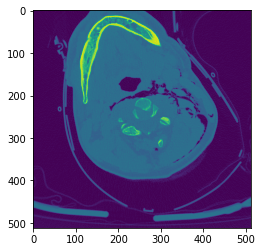

In [6]:
import pydicom as dicom

train_path = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.21651"

path_image = train_path + "/201.dcm"
print(path_image)

ds = dicom.dcmread(path_image)
plt.imshow(ds.pixel_array)

In [7]:
# The segmented 'nii' files will provide us of the target.
# Still need to study what this 'transpose' is really doing.
import nibabel as nib
segmentations = nib.load("../input/rsna-2022-cervical-spine-fracture-detection/segmentations/1.2.826.0.1.3680043.21651.nii").get_fdata()[:, ::-1, ::-1].transpose(2, 1, 0)
print(segmentations.shape) # segmentations shape (num_images, height, width) 

# shape here for the study '1.2.826.0.1.3680043.10633' is 429 images of 512x512 pixels. 

(510, 512, 512)


**Segmented image**

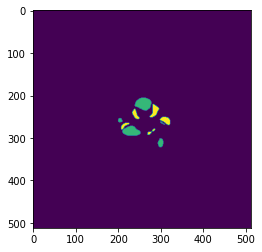

In [8]:
plt.imshow(segmentations[200])
plt.show()

In [9]:
np.unique(segmentations[100])

array([0., 1.])

In [10]:
#Segmentation 200. Indicates 201 dicom file IS REFERENCING C3.
vertebrae = []

for i in range (0, segmentations.shape[0]):
    if (np.unique(segmentations[i]).size == 2):
        vertebrae.append(i)

In [11]:
vertebrae

[3,
 4,
 18,
 19,
 70,
 71,
 72,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 50

In [12]:
train[train.StudyInstanceUID == "1.2.826.0.1.3680043.780"]

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
654,1.2.826.0.1.3680043.780,1,0,1,0,0,0,0,0


We cannot use segmented images to train the model. Because testing images below are in the raw data format, without segmenting.
But, at least for now, only segmented images are important because we know their corresponding vertebrae. So let's train the model only with them.

In [13]:
segmentations_path = "../input/rsna-2022-cervical-spine-fracture-detection/segmentations/"
patients_to_train = os.listdir(segmentations_path)
df = pd.DataFrame()

for i in range (0, len(patients_to_train)):
    

    segmentations = nib.load(segmentations_path + patients_to_train[i]).get_fdata()[:, ::-1, ::-1].transpose(2, 1, 0)
    study = patients_to_train[i][:-4] #removing extention
    
    for j in range (0, segmentations.shape[0]):
        if (np.unique(segmentations[j]).size == 2): #returns the IMAGES that only shows one vertebrae in the axial pane. (note that some images contains multiple bones and that can be confusing for the algorithm)
              
            label = np.unique(segmentations[j])[1] #detecting label. ex: C1.
            if (label == 1): # after detecting label, checking if it's fractured or not. '0' NOT FRACTURED - '1' FRACTURED. "values[0] contains this feature"
                fractured = train[train.StudyInstanceUID == study]["C1"].values[0]
            elif (label == 2):
                fractured = train[train.StudyInstanceUID == study]["C2"].values[0]
            elif (label == 3):
                fractured = train[train.StudyInstanceUID == study]["C3"].values[0]
            elif (label == 4):
                fractured = train[train.StudyInstanceUID == study]["C4"].values[0]
            elif (label == 5):
                fractured = train[train.StudyInstanceUID == study]["C5"].values[0]
            elif (label == 6):
                fractured = train[train.StudyInstanceUID == study]["C6"].values[0]
            elif (label == 7):
                fractured = train[train.StudyInstanceUID == study]["C7"].values[0]
          

            new_row = {'StudyInstanceUID': study, 'Image': j, 'Label': label, 'Fractured': fractured}
            df = df.append(new_row, ignore_index=True)


In [14]:
df_final = df[df["Label"]<8]
df_final.reset_index(inplace=True)
df_final

,index,StudyInstanceUID,Image,Label,Fractured
0,0,1.2.826.0.1.3680043.780,60.0,1.0,0.0
1,1,1.2.826.0.1.3680043.780,61.0,1.0,0.0
2,2,1.2.826.0.1.3680043.780,62.0,1.0,0.0
3,3,1.2.826.0.1.3680043.780,84.0,2.0,1.0
4,4,1.2.826.0.1.3680043.780,85.0,2.0,1.0
...,...,...,...,...,...
3781,4915,1.2.826.0.1.3680043.31077,373.0,7.0,0.0
3782,4916,1.2.826.0.1.3680043.31077,374.0,7.0,0.0
3783,4917,1.2.826.0.1.3680043.31077,375.0,7.0,0.0
3784,4918,1.2.826.0.1.3680043.31077,376.0,7.0,0.0


In [15]:
#Check ok Images (with above code)
df[df.StudyInstanceUID == "1.2.826.0.1.3680043.21651"]["Image"]

#Check!

2779      3.0
2780      4.0
2781     18.0
2782     19.0
2783     70.0
        ...  
2947    505.0
2948    506.0
2949    507.0
2950    508.0
2951    509.0
Name: Image, Length: 173, dtype: float64

# TEST IMAGE

../input/rsna-2022-cervical-spine-fracture-detection/test_images/1.2.826.0.1.3680043.22327/
../input/rsna-2022-cervical-spine-fracture-detection/test_images/1.2.826.0.1.3680043.22327/60.dcm


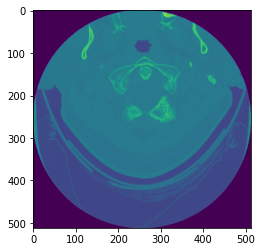

In [16]:
test_path = "../input/rsna-2022-cervical-spine-fracture-detection/test_images/"
studies = os.listdir(test_path)


path_study = test_path + studies[0] + "/"
print(path_study)

images = os.listdir(path_study)
path_image = path_study + images[102]
print(path_image)

ds = dicom.dcmread(path_image)
plt.imshow(ds.pixel_array)

# BAD IMAGES

In [17]:
import pydicom as dicom
from pydicom import dcmread
import matplotlib.pylab as plt
import cv2 

#bad_images 

# studies = os.listdir("../input/rsna-2022-cervical-spine-fracture-detection/train_images")

# for study in studies:
#     path_study = "../input/rsna-2022-cervical-spine-fracture-detection/train_images/" + study + "/"
#     images = os.listdir(path_study)
#     for image in images:
#         ds = dcmread(path_study + image)
#         try: 
#             trying = ds.pixel_array
#         except:
#             print(path_study)
#             break

In [18]:
f = open("../input/badimages/bad_images.txt", "r")
bad_images = []

# reading the file
data = f.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
bad_images = data.replace('\n', ' ').split(",")
  
# printing the data
print(bad_images[1])
f.close()

 ../input/rsna-2022-cervical-spine-fracture-detection/train_images/1.2.826.0.1.3680043.2668/
